<a href="https://colab.research.google.com/github/gautam200/demo/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('/content/Lung Capacity.xlsx')

In [ ]:
df

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Risk
0,6.475,6,62.1,no,male,0
1,10.125,18,74.7,yes,female,0
2,9.550,16,69.7,no,female,1
3,11.125,14,71.0,no,male,0
4,4.800,5,56.9,no,male,0
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,0
721,9.050,18,72.0,yes,male,1
722,3.850,11,60.5,yes,female,0
723,9.825,15,64.9,no,female,0


In [ ]:
df.shape

(725, 6)

In [ ]:
df.isna().sum()

LungCap(cc)       0
Age( years)       0
Height(inches)    0
Smoke             0
Gender            0
Risk              0
dtype: int64

In [ ]:
df.dtypes

LungCap(cc)       float64
Age( years)         int64
Height(inches)    float64
Smoke              object
Gender             object
Risk                int64
dtype: object

In [ ]:
df.columns

Index(['LungCap(cc)', 'Age( years)', 'Height(inches)', 'Smoke', 'Gender',
       'Risk'],
      dtype='object')

<Axes: >

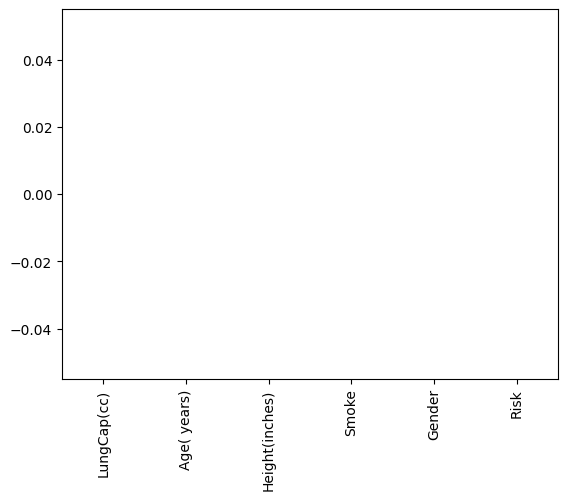

In [ ]:
df.isna().sum().plot(kind='bar')

In [ ]:
cat_columns = ['Smoke','Risk']
df_dummy = pd.get_dummies(df,columns=cat_columns,drop_first=True)
df_dummy.shape

(725, 6)

In [ ]:
df_dummy.columns

Index(['LungCap(cc)', 'Age( years)', 'Height(inches)', 'Gender', 'Smoke_yes',
       'Risk_1'],
      dtype='object')

In [ ]:
newdf2 = df.merge(df, how = "cross")
newdf2.shape

(525625, 12)

In [ ]:
newdf2

,LungCap(cc)_x,Age( years)_x,Height(inches)_x,Smoke_x,Gender_x,Risk_x,LungCap(cc)_y,Age( years)_y,Height(inches)_y,Smoke_y,Gender_y,Risk_y
0,6.475,6,62.1,no,male,0,6.475,6,62.1,no,male,0
1,6.475,6,62.1,no,male,0,10.125,18,74.7,yes,female,0
2,6.475,6,62.1,no,male,0,9.550,16,69.7,no,female,1
3,6.475,6,62.1,no,male,0,11.125,14,71.0,no,male,0
4,6.475,6,62.1,no,male,0,4.800,5,56.9,no,male,0
...,...,...,...,...,...,...,...,...,...,...,...,...
525620,7.100,10,67.7,no,male,0,5.725,9,56.0,no,female,0
525621,7.100,10,67.7,no,male,0,9.050,18,72.0,yes,male,1
525622,7.100,10,67.7,no,male,0,3.850,11,60.5,yes,female,0
525623,7.100,10,67.7,no,male,0,9.825,15,64.9,no,female,0


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/1.01. Simple linear regression (1).csv')
df

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [ ]:
x = df.iloc[:,:-1].values

In [ ]:
x

array([[1714],
       [1664],
       [1760],
       [1685],
       [1693],
       [1670],
       [1764],
       [1764],
       [1792],
       [1850],
       [1735],
       [1775],
       [1735],
       [1712],
       [1773],
       [1872],
       [1755],
       [1674],
       [1842],
       [1786],
       [1761],
       [1722],
       [1663],
       [1687],
       [1974],
       [1826],
       [1787],
       [1821],
       [2020],
       [1794],
       [1769],
       [1934],
       [1775],
       [1855],
       [1880],
       [1849],
       [1808],
       [1954],
       [1777],
       [1831],
       [1865],
       [1850],
       [1966],
       [1702],
       [1990],
       [1925],
       [1824],
       [1956],
       [1857],
       [1979],
       [1802],
       [1855],
       [1907],
       [1634],
       [1879],
       [1887],
       [1730],
       [1953],
       [1781],
       [1891],
       [1964],
       [1808],
       [1893],
       [2041],
       [1893],
       [1832],
       [18

In [ ]:

 y = df.iloc[:,-1].values

In [ ]:
y


array([2.4 , 2.52, 2.54, 2.74, 2.83, 2.91, 3.  , 3.  , 3.01, 3.01, 3.02,
       3.07, 3.08, 3.08, 3.12, 3.17, 3.17, 3.17, 3.17, 3.19, 3.19, 3.19,
       3.2 , 3.21, 3.24, 3.28, 3.28, 3.28, 3.28, 3.28, 3.28, 3.28, 3.29,
       3.29, 3.29, 3.31, 3.32, 3.34, 3.37, 3.37, 3.37, 3.38, 3.38, 3.39,
       3.39, 3.4 , 3.4 , 3.4 , 3.41, 3.41, 3.41, 3.42, 3.42, 3.42, 3.44,
       3.47, 3.47, 3.47, 3.47, 3.48, 3.49, 3.49, 3.5 , 3.51, 3.51, 3.52,
       3.52, 3.54, 3.58, 3.58, 3.59, 3.59, 3.6 , 3.6 , 3.61, 3.62, 3.64,
       3.65, 3.71, 3.71, 3.71, 3.73, 3.76, 3.81])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
X_train

array([[1670],
       [1925],
       [1934],
       [1880],
       [1990],
       [2050],
       [1755],
       [1893],
       [1764],
       [1934],
       [1730],
       [1786],
       [1931],
       [1826],
       [1634],
       [1712],
       [1893],
       [1685],
       [1674],
       [1777],
       [1792],
       [1850],
       [1764],
       [1808],
       [2015],
       [1808],
       [1802],
       [1824],
       [1962],
       [1872],
       [1821],
       [1850],
       [1787],
       [1857],
       [1974],
       [1702],
       [1810],
       [2020],
       [1953],
       [1775],
       [1936],
       [1891],
       [2041],
       [1975],
       [1954],
       [1794],
       [1664],
       [1907],
       [1722],
       [1760],
       [1687],
       [1843],
       [2021],
       [1761],
       [1964],
       [1778],
       [1773],
       [1855]])

In [ ]:
Y_train

array([2.91, 3.4 , 3.28, 3.29, 3.39, 3.81, 3.17, 3.51, 3.  , 3.54, 3.47,
       3.19, 3.58, 3.28, 3.42, 3.08, 3.5 , 2.74, 3.17, 3.37, 3.01, 3.52,
       3.  , 3.32, 3.62, 3.49, 3.41, 3.4 , 3.76, 3.17, 3.28, 3.38, 3.28,
       3.41, 3.24, 3.39, 3.71, 3.65, 3.47, 3.29, 3.71, 3.48, 3.51, 3.6 ,
       3.34, 3.28, 2.52, 3.42, 3.19, 2.54, 3.21, 3.71, 3.61, 3.19, 3.49,
       3.59, 3.12, 3.42])

In [ ]:
#Standardizing the dataset important for the output accha aata hai
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
scaler.transform(X_test)

array([[ 0.86891208],
       [-1.20077584],
       [-0.57046179],
       [-1.68056713],
       [-1.00321472],
       [ 0.85950441],
       [-1.00321472],
       [ 0.00340623],
       [-1.39833696],
       [-0.0906705 ],
       [ 0.21978269],
       [ 1.07588087],
       [ 0.06925993],
       [ 1.36751872],
       [ 0.42675148],
       [ 0.3514901 ],
       [ 0.12570597],
       [ 1.46159544],
       [ 1.1699576 ],
       [ 1.29225734],
       [-0.62690782],
       [-0.68335386],
       [-0.10007817],
       [ 1.67797191],
       [ 0.07866761],
       [ 0.182152  ]])

In [ ]:
from sklearn.linear_model import LinearRegression
 #cross validation
from sklearn.model_selection import cross_val_score


In [ ]:
#creating object
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
mse = cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv = 5)
mse

array([-0.02572034, -0.03974168, -0.03039402, -0.0544529 , -0.06752345])

In [ ]:
np.mean(mse)

-0.04356647615354188

In [ ]:
#prediction on test data
reg_pred = regression.predict(X_test)

In [ ]:
reg_pred

array([3.48725358, 3.14102329, 3.24646615, 3.06076082, 3.17407255,
       3.4856798 , 3.17407255, 3.34246637, 3.10797404, 3.32672863,
       3.37866317, 3.52187661, 3.35348278, 3.5706636 , 3.4132862 ,
       3.40069601, 3.36292543, 3.58640134, 3.53761435, 3.55807341,
       3.23702351, 3.22758086, 3.32515485, 3.62259814, 3.35505656,
       3.37236807])

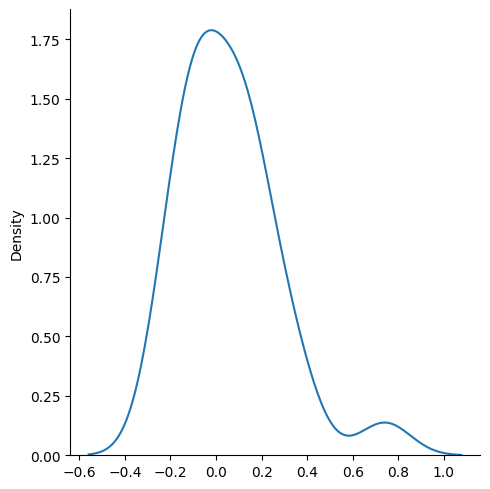

In [ ]:
import seaborn as sns
sns.displot(reg_pred-Y_test,kind='kde')
#Variance is less is good
#-0.4 to 0.4 more points are there
#remaining the outliers differnece is high

In [ ]:
 from sklearn.metrics import r2_score
 score = r2_score(reg_pred,Y_test)

In [ ]:
score

-0.9987491172229863

**REAL ESTATE**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Real-estate1 (1).csv')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
df.drop('No',inplace=True, axis=1)

KeyError: ignored

In [ ]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
X = df.drop('Y house price of unit area',axis=1)
Y = df['Y house price of unit area']

In [ ]:
X

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [ ]:
Y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [ ]:
len(X_train)

331

In [ ]:
len(X_test)

83

In [ ]:
len(Y_train)

331

In [ ]:
len(Y_test)

83

In [ ]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [ ]:
regression.fit(X_train,Y_train)

LinearRegression()

In [ ]:
pred = regression.predict(X_test)

In [ ]:
pred

array([40.09548022, 12.83819172, 42.00966923, 12.64733002, 42.44343803,
       39.83198984, 40.55595745, 33.86023762, 49.37328265, 45.87031976,
       45.86310332, 40.64517161, 39.50676203, 40.04955455, 47.11860745,
       38.13995857, 40.08417262, 41.12540438, 40.83964717, 42.37860913,
       49.70003677, 31.08231285, 39.67622569, 45.52764709, 46.18872415,
       43.43143246, 46.35880414, 26.20749681, 48.13688227, 21.53997799,
       44.8104349 , 34.94131598, 42.6644548 , 38.37379621, 43.98018394,
       32.28477958, 47.62406077, 39.77407301, 52.55712201,  7.46443039,
       52.54110472, 33.1285138 , 34.22107416, 49.59242876, 15.37567885,
       43.36042455, 42.40643117, 12.9983919 , 33.99155573, 48.50179814,
       53.67150141, 38.73047082, 47.73879852, 25.42163729, 30.68691477,
       34.27187582, 48.91161249, 40.61983209, 43.45816985, 32.95307348,
       43.85237072, 43.62659423, 39.55165632, 47.0209757 , 36.84017788,
       30.00963218,  9.66438363, 34.92190591, 46.16892784, 39.83

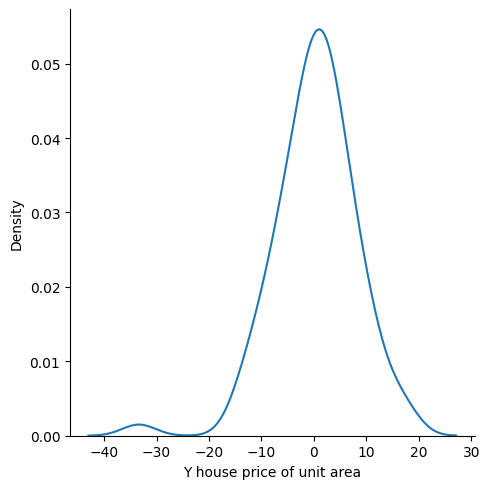

In [ ]:
import seaborn as sns
sns.displot(pred-Y_test,kind='kde')

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(pred,Y_test)

In [ ]:
score

0.43767820034249705

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
print("mse:",mean_squared_error(pred,Y_test))

mse: 59.522435319026265


In [ ]:
print("mae:",mean_absolute_error(pred,Y_test))

mae: 5.760226029972323


**RIDGE REGRESSION**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

reg = Ridge()

In [ ]:
parameters = { 'alpha':[1,2,3,4,5,6,10,20,30,40]}

ridgecv=GridSearchCV(reg,parameters,scoring='neg_mean_squared_error',cv =5)
ridgecv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridgecv.best_params_)

{'alpha': 1}


In [ ]:
pred = ridgecv.predict(X_test)

In [ ]:
pred

array([39.32559245, 13.36858761, 41.42677902, 13.01787238, 42.27145875,
       40.91284851, 42.6014929 , 33.49285285, 49.35249914, 44.69309741,
       47.80098911, 43.940787  , 38.85369854, 42.18152795, 46.4689386 ,
       37.27158308, 41.16322394, 40.83660805, 42.26982959, 42.14431357,
       49.77653187, 34.21671066, 35.2988472 , 43.67329585, 45.30667662,
       44.77438163, 47.61314833, 26.01962203, 46.71846576, 22.02978654,
       48.70565707, 36.34623421, 41.56986089, 36.3643417 , 44.9283464 ,
       35.57167112, 46.76023313, 38.34642344, 50.57050633,  3.48453982,
       53.99971066, 32.10334006, 33.15138514, 48.92348621, 17.62490269,
       47.53123308, 40.73718714, 14.59543636, 34.01640426, 52.5342994 ,
       54.25770115, 37.23585188, 46.56440167, 29.4118879 , 33.76968298,
       34.71542454, 47.16757803, 40.38004438, 45.09106819, 34.10283917,
       42.95209931, 43.98574788, 38.54732651, 46.6928162 , 38.63319636,
       29.90972922,  9.57546486, 33.65703052, 44.0664882 , 40.91

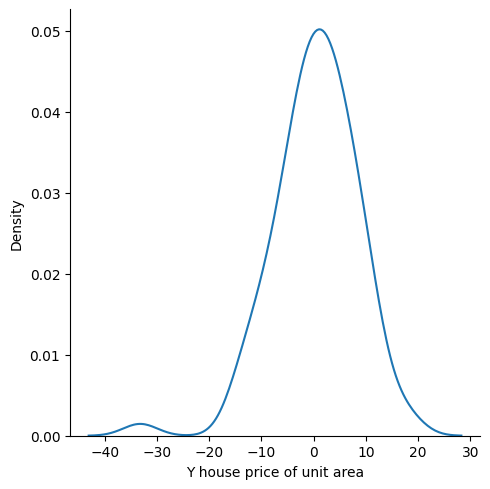

In [ ]:
import seaborn as sns
sns.displot(pred-Y_test,kind='kde')

In [ ]:
from sklearn.metrics import r2_score
score  = r2_score(pred,Y_test)

In [ ]:
score

0.3979433253588288

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [ ]:
print("mse:",mean_squared_error(pred,Y_test))

mse: 62.87088311050719


In [ ]:
print("mae:",mean_absolute_error(pred,Y_test))


mae: 6.048731909482083


In [ ]:
print(ridgecv.best_score_)

-90.04324630617475


In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso()

In [ ]:
parameters = { 'alpha':[1,2,3,4,5,6,10,20,30,40]}

lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv =5)
lassocv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40]},
             scoring='neg_mean_squared_error')

In [ ]:
pre = lassocv.predict(X_test)

In [ ]:
pre

array([41.53860511, 12.80115383, 40.32881474, 12.45845367, 40.77880004,
       41.01363483, 41.94326244, 34.50651927, 47.46384851, 43.09255214,
       46.94621384, 44.34552416, 41.092101  , 42.45364168, 47.94475817,
       35.16675537, 40.89658852, 43.12275722, 43.53689976, 43.13601426,
       51.8109337 , 34.6442545 , 36.47549979, 43.93052101, 46.41028312,
       45.78557982, 45.68346426, 29.12477362, 45.95278902, 24.29212718,
       46.70621809, 35.0544291 , 43.68217468, 34.36579786, 45.80466074,
       34.59577591, 46.02798224, 37.30852527, 50.97216592,  5.27861265,
       51.79017465, 33.91089037, 35.04120229, 46.3126166 , 17.08563304,
       46.82672266, 42.55197087, 17.31813191, 32.72332178, 50.27189197,
       51.61701933, 39.70346531, 47.24620005, 29.68755619, 34.6684938 ,
       36.74704519, 46.37846097, 40.2938146 , 47.04317102, 35.15138628,
       40.60780478, 42.22545405, 39.35846777, 47.60928429, 41.37405619,
       29.95002581, 12.64933511, 31.44814065, 46.54813604, 41.01

In [ ]:
print(lassocv.best_params_)

{'alpha': 1}


In [ ]:
print(lassocv.best_score_)

-92.38105855769506


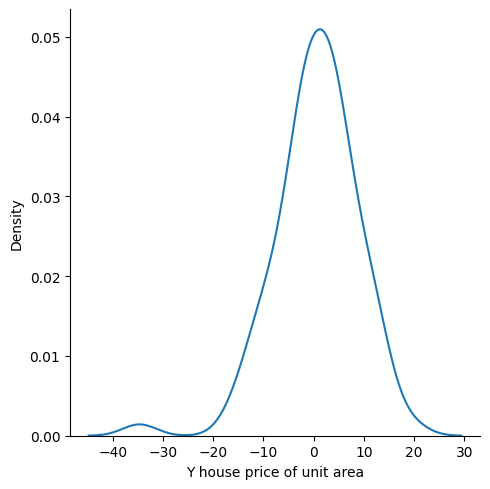

In [ ]:
import seaborn as sns
sns.displot(pre-Y_test,kind='kde')